<a href="https://colab.research.google.com/github/cookie-pan/Airbnb_price_analyst/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**数据分析背景**

Airbnb是一个旅行房屋租赁社区，用户可通过网络或手机应用程序发布、搜索度假房屋租赁信息并完成在线预定程序。对 Airbnb 提供的数以百万计的挂牌信息进行数据分析，是该公司的一个关键因素。这数以百万计的列表产生了大量的数据——数据可以被分析和用于安全、商业决策、理解客户和供应商(主机)的行为和平台上的表现、指导营销活动、实施创新的附加服务等等。我们需通过已知数据，挖掘其中的隐藏的信息和规律，为租客和房东提供更便利的服务来使其自身获得良好的发展。

**分析的目的**

  One of the machine learning models at AirBNB is Smart Pricing. After 
a client has entered the details of their rental, AirBNB suggests an appropriate price. The aim of this notebook is to build and train a Smart Pricing model for this dataset.
  


我们建立机器学习模型的目的是为了智能定价，当房东将想要出租的房子具体信息输入后，爱彼迎给出一个合理的价格建议。我们的目的是通过这个数据集建立并训练智能的定价模型 



In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm  #qq图
from datetime import datetime
# import pandas_profiling as pp


import warnings 
warnings.filterwarnings('ignore')

In [196]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airbnb/AB_NYC_2019.csv")

In [197]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [198]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**由爱彼迎官方website的数据字典对较模糊的特征相应的解释：**



*   id：房子的编号
*   name：房子的描述


*   host_id：房东的id，每个房东原则上是unique

*   availability_365：未来365天内房屋还未被预租的天数

*   number_of_reviews：租客评论数

*   calculated_host_listings_count：房东出租的房屋总数









In [199]:
#查看每个特征变量的种类
# data.apply("nunique").to_frame()
data.nunique().to_frame()
# data['neighbourhood_group'].unique()


,0
id,48895
name,47905
host_id,37457
host_name,11452
neighbourhood_group,5
neighbourhood,221
latitude,19048
longitude,14718
room_type,3
price,674


查看缺失值并确认缺失值是否随机缺失(MCAR或者MAR)

In [200]:
data.isnull().sum().to_frame(name="featrue_na_num")


,featrue_na_num
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [201]:
#10052条
data[(data['last_review'].isnull())&(data['reviews_per_month'].isnull())&(data['number_of_reviews']==0)]
#缺失的原因：没有评论，所以是Na值，对应的reviews_per_month也是空值

#用0填充
data["reviews_per_month"].fillna(0,inplace=True)

#检查错误值:是否有房子的每月评价数为0但是总评价数不为0
data[(data['reviews_per_month']==0)&(data['number_of_reviews']!=0)]
#无错误数据

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [202]:
data[data["name"].isnull()]
data[data["host_name"].isnull()]
#name和host_name的缺失没有关系

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,0.00,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,0.00,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


四分位数

In [203]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 10000, 'display.max_rows', 10000)
Q1=data.quantile(0.25)
Q2=data.quantile(0.75)
IQR=Q2-Q1
IQR.to_frame()

###price和availability_365比较分散

,0
id,1.968023e+07
host_id,9.961239e+07
latitude,7.301500e-02
longitude,4.679500e-02
price,1.060000e+02
minimum_nights,4.000000e+00
number_of_reviews,2.300000e+01
reviews_per_month,1.540000e+00
calculated_host_listings_count,1.000000e+00
availability_365,2.270000e+02


# processing

### 日期处理

把日期那列转为日期格式

In [204]:
data['last_review']=pd.to_datetime(data['last_review'],infer_datetime_format=True)

把日期转为相对位置的数据格式

In [205]:
earliest_time=data['last_review'].sort_values(ascending=True)[317]
data['last_review']=data['last_review'].fillna(earliest_time)
data['last_review'] = data['last_review'].apply(lambda x: x.toordinal() - earliest_time.toordinal())

### 价格处理

delete错误数据

In [206]:
data["price"].max()
data["price"].min()
data["price"].describe()
#最低价格为0
data[data["price"]==0]
#分析原因：这些房屋可能是房东和租客为了避免平台扣费而私下交易，因为我们这个项目的目的是为业主提供可行性建议，于是删除这些数据
data.drop(index=data[data["price"]==0].index.to_list(),inplace=True)
data=data.reset_index(drop=True)

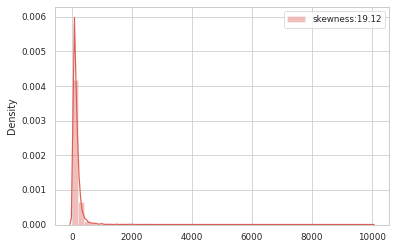

In [207]:
##作price分布图
fig=sns.distplot(x=data["price"],label='skewness:%.2f'%(data['price'].skew()))
fig.legend(loc="best")
# print("Price偏度系数：",data["price"].skew())

价格特征严重右偏，且存在部分极端值，对机器学习模型如线性回归有消极影响，用对数函数对它进行处理

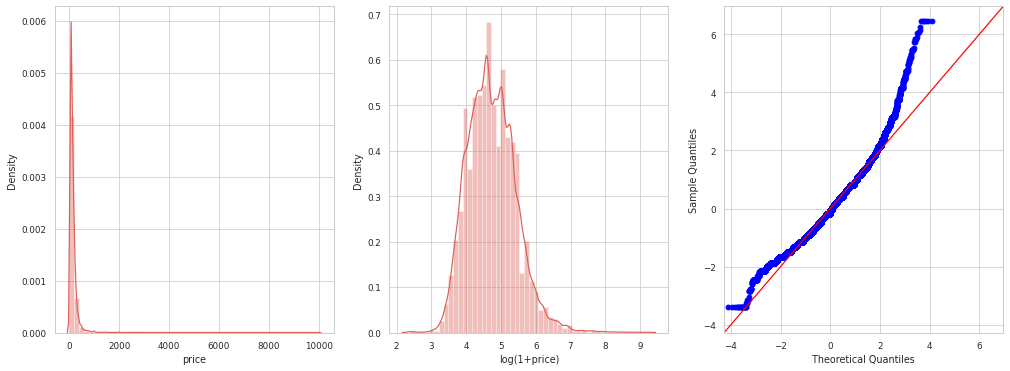

In [208]:
# data["price"].map(lambda x:np.log(x)).value_counts().index.sort_values()
# data["log_price"]=data["price"].map(lambda x:np.log(x))
fig, axes = plt.subplots(1,3,figsize=(17,6))
sns.distplot(data['price'], ax=axes[0])
sns.distplot(np.log1p(data['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(data['price']), stats.norm, fit=True, line='45', ax=axes[2]);
#不加分号会出现两排图形
data["log_price"]=np.log1p(data['price'])

# 特征分析

### 区域分析

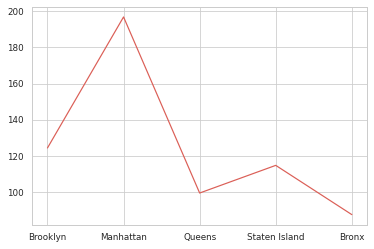

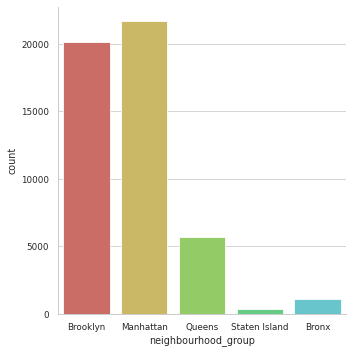

In [209]:
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("hls", 8))
sns.set_context("paper")



#sns.catplot(kind="box",x="neighbourhood_group",y="price",data=data)
#由箱线图看出price较分散的情况下，箱线图较难描述
group_array=data["neighbourhood_group"].unique()
group_df=pd.DataFrame(columns=["neighbouhood_group","mean"])
for i in group_array:
  
  new=pd.DataFrame({'neighbouhood_group':i,
                 'mean':data["price"][data['neighbourhood_group']==i].mean()
                 
                 },index=[1]
                )
  
  group_df=group_df.append(new,ignore_index=True)
  

group_df
plt.figure()
plt.plot(group_df["neighbouhood_group"],group_df["mean"])

sns.catplot(x="neighbourhood_group", kind="count", data=data)



曼哈顿和布鲁克林的房价显著高于其他三个区域，作为世界上消费水平最高的地区之一，这个结果也符合情理




发现除了staten island以外其他区域的房价都与那个区域的出租房屋总量正相关：
我们在训练模型时把neighbourhood用one_hot_encode的方式处理，在训练模型时可以更好的利用这个特征


**每个地区房量总数似乎和价格也有一定程度关系，把这个变量归入特征**

In [210]:
data_dict=data['neighbourhood_group'].value_counts()
data["area_num"]=data['neighbourhood_group'].map(data_dict)
data["area_num"]

0        20095
1        21660
2        21660
3        20095
4        21660
         ...  
48879    20095
48880    20095
48881    21660
48882    21660
48883    21660
Name: area_num, Length: 48884, dtype: int64

In [211]:
print(data.corrwith(data["price"]))
data.corrwith(data["log_price"])
#价格对数化处理后与其他变量的相关性显著提高

id                                0.010639
host_id                           0.015294
latitude                          0.033899
longitude                        -0.149954
price                             1.000000
minimum_nights                    0.042805
number_of_reviews                -0.047926
last_review                      -0.084643
reviews_per_month                -0.050531
calculated_host_listings_count    0.057462
availability_365                  0.081847
log_price                         0.640074
area_num                          0.109511
dtype: float64


id                               -0.015258
host_id                          -0.016955
latitude                          0.079285
longitude                        -0.325892
price                             0.640074
minimum_nights                    0.033386
number_of_reviews                -0.042650
last_review                      -0.079221
reviews_per_month                -0.060483
calculated_host_listings_count    0.132836
availability_365                  0.099179
log_price                         1.000000
area_num                          0.256272
dtype: float64

### 经纬度分析

-73.71299


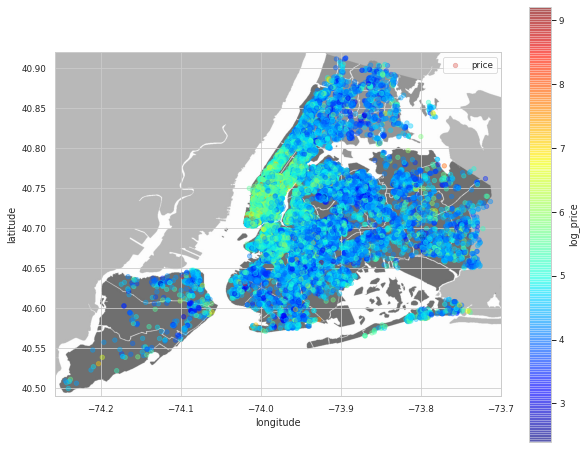

In [212]:
import matplotlib.image as mpimg
%matplotlib inline
img=mpimg.imread("/content/drive/MyDrive/Colab Notebooks/airbnb/New_York_City_.png",0)
min_la=data['latitude'].min()
max_la=data['latitude'].max()
min_long=data['longitude'].min()
max_long=data['longitude'].max()
print(max_long)
# plt.imshow(img)
#根据经纬度最大和分钟缩放图像以获得正确的输出
plt.figure(figsize=(10,8))
plt.imshow(img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92]) #zorder用来调节颜色和线条粗细
ax=plt.gca()
data.plot(kind='scatter', x='longitude', y='latitude', label='price', c='log_price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)




**在经纬图的中心地区是价格最贵的，如果我们要做线性回归，可以对经纬度做归一化处理后，创造一个新特征:与区域中心的距离相关的特征**



1、对经纬度数据做归一化处理

In [213]:
# from sklearn.preprocessing import StandardScaler
# std=StandardScaler()


la_mean=data['latitude'].mean()
lo_mean=data["longitude"].mean()
data["std_latitude"]=data["latitude"].map(lambda x:x/la_mean)
data["std_longitude"]=data["longitude"].map(lambda x:x/lo_mean)
# df_tem=pd.DataFrame(std.fit_transform(data[['latitude',"longitude"]]),columns=["std_latitude","std_longitude"])
# print(df_tem.isnull().sum())
# print(df_tem.shape)
# data=pd.concat([data,df_tem],axis=1)
data.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
log_price                          0
area_num                           0
std_latitude                       0
std_longitude                      0
dtype: int64

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48884 entries, 0 to 48883
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48868 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48863 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  last_review                     

2、创造新特征

In [215]:
# (data['std_latitude'].pow(2)+data['std_longitude'].pow(2)).pow(1/2).value_counts(dropna=False)

data["core_distance"]=(data['std_latitude'].pow(2)+data['std_longitude'].pow(2))


print(data["core_distance"][data['neighbourhood_group']=="Brooklyn"].mean())
print(data["core_distance"][data['neighbourhood_group']=="Queens"].mean())

data["core_cat"]=data["core_distance"].map(lambda x:1 if x<=1.99790 else 0)
data.corrwith(data["log_price"])


1.9978186776495879
1.9979819946876594


id                               -0.015258
host_id                          -0.016955
latitude                          0.079285
longitude                        -0.325892
price                             0.640074
minimum_nights                    0.033386
number_of_reviews                -0.042650
last_review                      -0.079221
reviews_per_month                -0.060483
calculated_host_listings_count    0.132836
availability_365                  0.099179
log_price                         1.000000
area_num                          0.256272
std_latitude                      0.079285
std_longitude                     0.325892
core_distance                     0.216493
core_cat                         -0.276676
dtype: float64

### room type分析

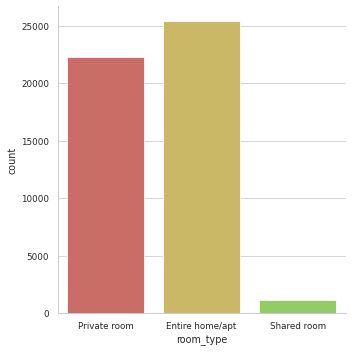

In [216]:
sns.catplot(x='room_type', kind='count' ,data=data)

shared room数量特别少，大多数都是出租房间和整栋房子的类型

In [217]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [218]:
data['log_price'][data['room_type']=="Private room"].mean()
data['log_price'][data['room_type']=="Entire home/apt"].mean()
data['log_price'][data['room_type']=="Shared room"].mean()
#平均价格和房间数量成正比

3.975221371835865

**把每种房间类型的总数当作一个特征变量**

In [219]:
df=data["room_type"].value_counts()
data["room_num"]=data["room_type"].map(df)

### 价格分析

分析房屋价格的有重价的分布情况

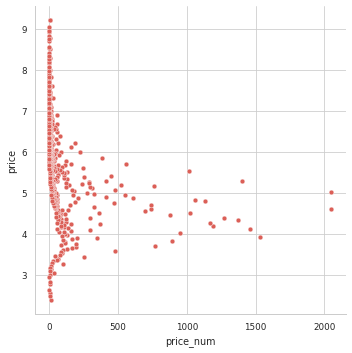

In [220]:
data_tem=data["log_price"].value_counts(ascending=False)
price_distri=data_tem.to_frame(name="price_num").assign(price=data_tem.index)
sns.relplot(x="price_num",y="price",data=price_distri)

将重价房屋数目加入数据集

In [221]:
dic_tem=data["price"].value_counts().to_dict()
data["sameprice_num"]=data["price"].map(dic_tem)

data["sameprice_num_cat"]=data["sameprice_num"].map(lambda x:1 if x>=100 else 0)

data.corrwith(data['log_price'])

id                               -0.015258
host_id                          -0.016955
latitude                          0.079285
longitude                        -0.325892
price                             0.640074
minimum_nights                    0.033386
number_of_reviews                -0.042650
last_review                      -0.079221
reviews_per_month                -0.060483
calculated_host_listings_count    0.132836
availability_365                  0.099179
log_price                         1.000000
area_num                          0.256272
std_latitude                      0.079285
std_longitude                     0.325892
core_distance                     0.216493
core_cat                         -0.276676
room_num                          0.396883
sameprice_num                    -0.229243
sameprice_num_cat                -0.297565
dtype: float64

### minimum_nights特征分析

Text(0, 0.5, 'count')

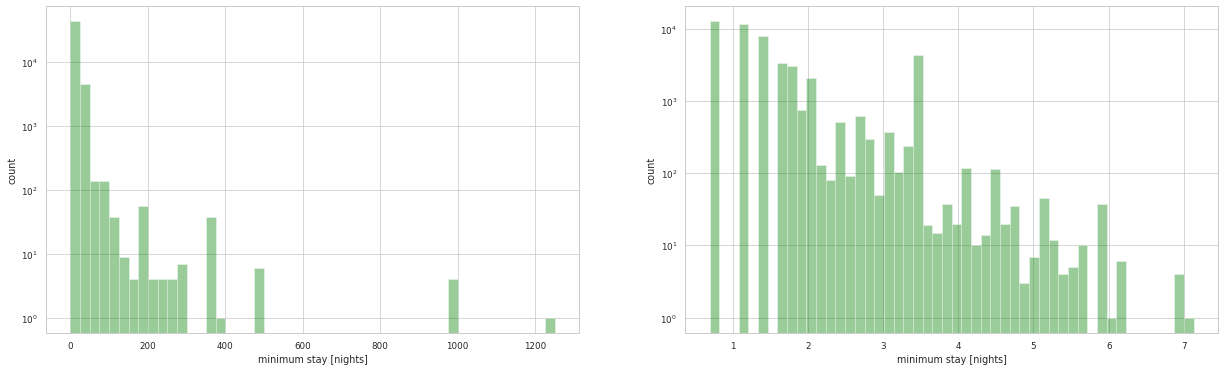

In [222]:
# sum(data["minimum_nights"].value_counts(dropna=False)>10)
# data["minimum_nights"].value_counts(dropna=False)
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(data['minimum_nights'], rug=False, kde=False, color="green", ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('minimum stay [nights]')
axes[0].set_ylabel('count')

sns.distplot(np.log1p(data['minimum_nights']), rug=False, kde=False, color="green", ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('minimum stay [nights]')
axes[1].set_ylabel('count')


最小停留夜晚数据分布极不均匀：对数处理

In [223]:
data["log_minnight"]=data["minimum_nights"].map(lambda x:np.log1p(x))

### name：房屋描述的特征分析

房屋的价格是否和name中一些词出现的次数有关？

In [225]:
data['name']
#租客是否租房会受房间描述和房间图片的影响，那价格是否也会受到这些因素的影响呢
#我们先用词性标注器对name中的形容词进行一个提取
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

tem_list=data["name"].tolist()
word_attri=[]
for i in tem_list:
  try:
    # print(i)
    text=nltk.word_tokenize(i)
    word_attri.append(nltk.pos_tag(text))
  except TypeError:
    word_attri.append(0)
#没有name的房子对应的值为0

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [226]:
###验证
tem_list[1]
word_attri[3]

[('Cozy', 'NNP'),
 ('Entire', 'NNP'),
 ('Floor', 'NNP'),
 ('of', 'IN'),
 ('Brownstone', 'NNP')]

In [227]:
#将每个房间name提取出来的字符串转成dataframe的格式
j=0
tem_dict=dict()
for i in word_attri:
  
  tem_dict[j]=[]
  if i==0:
      tem_dict[j].append(0)

  else: 
    for word,post in i:
      
      if post=="JJ" or post=="NNP":
        # print(word)
        tem_dict[j].append(word)
        # print(tem_dict[j])

    if len(tem_dict[j])==0:
      tem_dict[j].append(0)
    else:
      tem_dict[j]=','.join(tem_dict[j]) #结果即为：1,2,3,4,5
    
  j+=1
  

tem_dict    
# pd.DataFrame.from_dict(tem_dict, orient='index',columns=['word'])
# t_dict=dict([(k, pd.Series(v)) for k, v in tem_dict.items()])

tem_df=pd.DataFrame.from_dict(tem_dict,orient='index',columns=['word'])
#tem_df[tem_df["word"].isnull()]

In [228]:
#统计在描述房子的词汇中，最常见词汇以及它的词频
tem_word=[]
for i in tem_df["word"]:
  tem_word.append(i)

def split_word(x):
  return str(x).split(",")

#所有name中的所有词的汇总（有重复值）
word_list1=[]
for i in tem_word:
  t=split_word(i)
  try:
    for j in t:
      word_list1.append(j)
  except TypeError:
    print(t)

#统计词频
from collections import Counter
Counter(word_list1).most_common(50)
# len(Counter(word_list))



#把出现次数排名前50的描述词汇提取出来，去掉一些特殊符号
#对剩下的描述词每个都当作一个二元特征，如果name中出现了便是1
tem_list=Counter(word_list1).most_common(50)
word_list2=[]

for word,word_num in tem_list:
  word_list2.append(word)

for i in word_list2:
  tem_df[i]=tem_df["word"].map(lambda x: 1 if i in str(x).split(",") else 0)


In [229]:
tem_df.columns
print(tem_df["Cozy"].value_counts())
#考虑到每个词做一个特征样本之间悬殊太大
#我们可以把这50个特征简化为，name中包含的特征形容词个数
tem_df["word_num"]=tem_df["word"].map(lambda x:len(str(x).split(",")))
tem_df["word_num"].value_counts()

0    44766
1     4118
Name: Cozy, dtype: int64


3     10886
4     10869
2      8275
5      7492
1      4926
6      3950
7      1646
8       612
9       191
10       29
11        6
12        2
Name: word_num, dtype: int64

In [230]:
data=pd.concat([data,tem_df[["word","word_num"]]],axis=1)

# 模型训练与预测

In [231]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'log_price', 'area_num', 'std_latitude',
       'std_longitude', 'core_distance', 'core_cat', 'room_num',
       'sameprice_num', 'sameprice_num_cat', 'log_minnight', 'word',
       'word_num'],
      dtype='object')

In [234]:
cat=['neighbourhood_group',"neighbourhood","room_type"]
num=["latitude","longitude","minimum_nights","number_of_reviews","last_review","reviews_per_month","calculated_host_listings_count"\
     ,"availability_365","area_num","sameprice_num_cat","word_num","core_cat","room_num"  ]
pd.get_dummies(data[cat])
all=pd.concat([pd.get_dummies(data[cat]),data[num]],axis=1)
all_tar=data["log_price"]

In [235]:
all.shape
# all_tar.shape


(48884, 242)

In [238]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score,KFold
n_folds=10
kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits()


def rmse_cv(model):
    
    return cross_val_score(model, all, all_tar, scoring='neg_mean_squared_error', cv=kf)

for Model in [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor, HuberRegressor]:
    if Model == XGBRegressor: cv_res = rmse_cv(XGBRegressor(objective='reg:squarederror'))
    else: cv_res = rmse_cv(Model())
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, -cv_res.mean(), cv_res.std()))

LinearRegression: 905740767.69626 +/- 1886282531.893514
Ridge: 0.21036 +/- 0.016862
Lasso: 0.36636 +/- 0.035243
ElasticNet: 0.36546 +/- 0.035018
RandomForestRegressor: 0.18606 +/- 0.020080
XGBRegressor: 0.18772 +/- 0.017676
HuberRegressor: 0.37857 +/- 0.052895


集成模型普遍比线性模型对数据拟合的更好